In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()
#we have predictor variables and one dependent variable(Outcome).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


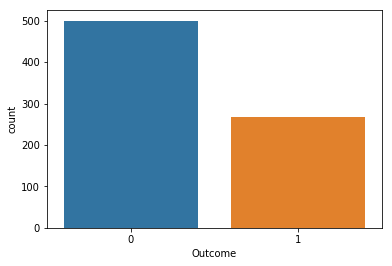

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.Outcome)
plt.show()

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.head() #Replaced all 0 values by NaN so it is easy to clean the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
#We can replace missing values by using various methods like mean,median,mode or the number of your choice...
#We'll do that with mean...You can rather try diffrent methods...And let me know if something works better...

df.fillna(df.mean(), inplace = True) #Filled Mising values with Mean
df.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


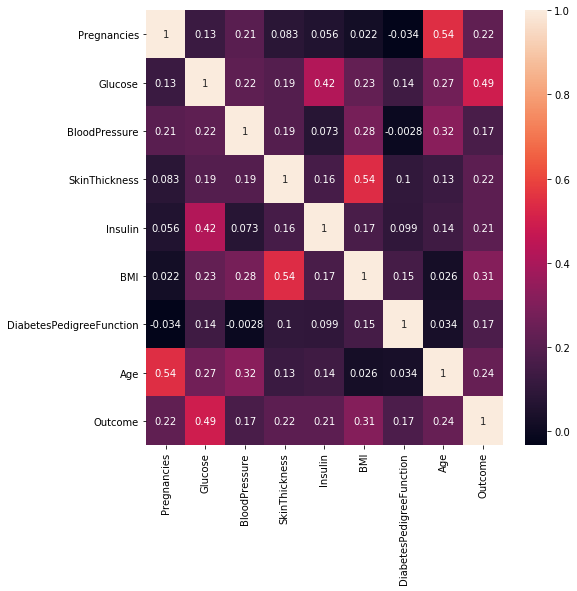

In [10]:
#Feature Selection

'''
To increase the efficiency of the model, we can eliminate some features. This is done by knowing the importance 
if a particular feature...

Lets try to find correlation between the features of our dataset..More the features are correlated, 
we can eliminate one of them...Heatmap folks!!

'''
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

In [11]:
'''
I'm not getting the heatmap into my head...Lets try another way....Use random forest to get the importances 
of feature...
'''
#feature selection
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df[df.columns[:8]]
y=df.Outcome
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,0
Glucose,0.263852
BMI,0.173490
Age,0.128386
DiabetesPedigreeFunction,0.121974
BloodPressure,0.090852
Insulin,0.080595
SkinThickness,0.071007
Pregnancies,0.069843


In [12]:
#So as we can see... The first 4 features displayed maybe important for us...We might neglect the rest...

#Now get your tools ready to sculpt diffrent models...

from sklearn.model_selection import train_test_split

features = df[["Glucose",'BMI','Age','DiabetesPedigreeFunction']]
labels = df.Outcome
features.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148.0,33.6,50,0.627
1,85.0,26.6,31,0.351
2,183.0,23.3,32,0.672
3,89.0,28.1,21,0.167
4,137.0,43.1,33,2.288


In [13]:

#Note that we have used stratification while splitting so that our data gets splitted in proportion with respect to Outcome column.

features_train,features_test,labels_train,labels_test = train_test_split(features,labels,stratify=df.Outcome,test_size=0.4)


In [14]:
#DTClassifier
from sklearn.tree import DecisionTreeClassifier 
dtclf = DecisionTreeClassifier()
dtclf.fit(features_train,labels_train)
dtclf.score(features_test,labels_test)

0.6688311688311688

In [15]:
#Looks fine...Lets see what Support Vector Machine shows SVM Try to change kernel parameter to other than "linear"..

#SVM
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.762987012987013

In [16]:
#Radial Basis Function
clf = svm.SVC(kernel="rbf",gamma='scale')
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.7532467532467533

In [17]:
#polynomial kernel
clf = svm.SVC(kernel="poly",gamma='scale')
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.7597402597402597

In [21]:
#sigmoid kernel
clf = svm.SVC(kernel="sigmoid",gamma='scale')
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.4090909090909091

In [22]:

#Naive Bayes Classifier
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(features_train,labels_train)
nbclf.score(features_test,labels_test)

0.7662337662337663

In [23]:

#KNN
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=2)
knnclf.fit(features_train,labels_train)
print(knnclf.score(features_test,labels_test))
    

0.6915584415584416


In [24]:

#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(features_train,labels_train)
clf1.score(features_test,labels_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.75

In [25]:
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
result = []

for clff in clfs:
    clff.fit(features_train,labels_train)
    acc = clff.score(features_test,labels_test)
    result.append(acc)
result_df = pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Naive Bayes,0.766234
Support Vector Machine,0.762987
Logistic Regression,0.750000
Decision Tree,0.707792
K Nearest Neighbor,0.691558


In [28]:
#We have been working on same training and testing set from a long time..We need to ry diffrent 
#combinations of training and testing sets...Lets bring Cross Validation into picture to help me out!

#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10)



In [ ]:
'''
By using cross validation, we will be splitting our dataset into 10 equal parts...
We keep one part for testing our algorithm and we train models on the rest...Now these parts that 
we divided the dataset into, keeps interchanging to form diffrent combinations of training and testing data...
We get difffrent accuracy score for each combination...This is done by cross_val_score()..
It gives us the list of diffrent accuracies...Now by taking the mean of this score, we can find 
the general accuracy of our model... This gives a generalised output..
'''

In [30]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifiers,features,labels,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)



,Accuracy
Naive Bayes,0.776042
Support Vector Machine,0.770796
Logistic Regression,0.766917
K Nearest Neighbor,0.706955
Decision Tree,0.704323


In [ ]:
'''
And now....We can see the accuracy changed a bit this time...It is because we have done cross validation 
and trained and tested the algorithms on diffrent combinations of data....

From the above output, it is clear that for this dataset, SVM, Logistic Regression and Naive Bayes works 
better
'''